In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams.update({'font.size': 12})

# Generating Random Data

In [2]:
#centers for the gaussian distributions
mean1 = [1, 1]
mean2 = [2.5, 2.5]

#covariance matrices for the gaussian distributions
cov1 = [[1 , 0.5],
        [0.5, 1]]
cov2 = [[1, -0.4],
        [-0.4, 1]]

In [3]:
#generating two gaussian distributions of 300 random data points
gaussian1 = np.random.multivariate_normal(mean1, cov1, size=300)
gaussian2 = np.random.multivariate_normal(mean2, cov2, size=300)

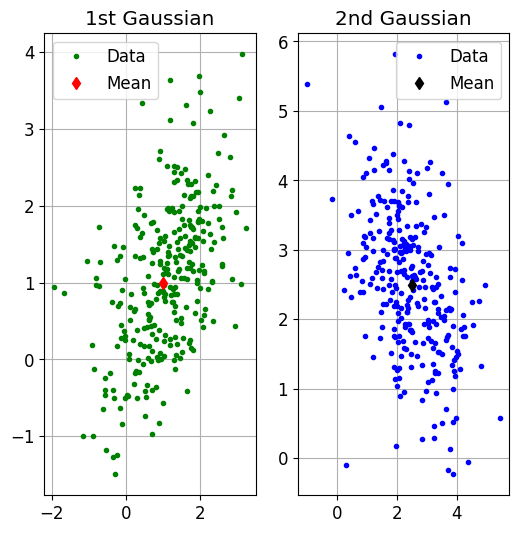

In [4]:
#plotting the distributions separately
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(gaussian1[:, 0], gaussian1[:,1], '.', color='g', label='Data')
ax1.plot(mean1[0], mean1[1], 'd', color='r', label='Mean')
ax1.grid()
ax1.legend()
ax1.set_title('1st Gaussian')

ax2 = fig.add_subplot(122)
ax2.plot(gaussian2[:,0], gaussian2[:,1], '.', color='b', label='Data')
ax2.plot(mean2[0], mean2[1], 'd', color='black', label='Mean')
ax2.grid()
ax2.legend()
ax2.set_title('2nd Gaussian')

plt.show()

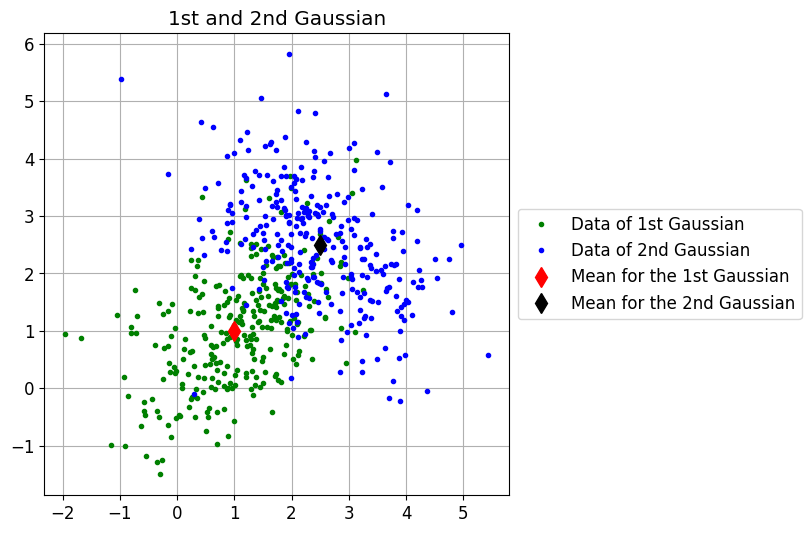

In [5]:
#plotting them together
plt.plot(gaussian1[:, 0], gaussian1[:,1], '.', color='g', label='Data of 1st Gaussian')
plt.plot(gaussian2[:,0], gaussian2[:,1], '.', color='b', label='Data of 2nd Gaussian')
plt.plot(mean1[0], mean1[1], 'd', color='red', markersize=10, label='Mean for the 1st Gaussian')
plt.plot(mean2[0], mean2[1], 'd', color='black', markersize=10, label='Mean for the 2nd Gaussian')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('1st and 2nd Gaussian')

plt.show()

# Making it messy to cluster

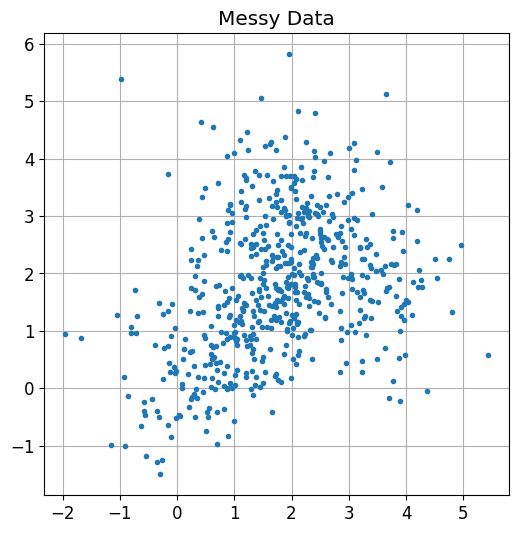

In [6]:
#Creating messy data to be clustered
x = np.concatenate((gaussian1[:,0], gaussian2[:,0]))
y = np.concatenate((gaussian1[:,1], gaussian2[:,1]))
X = np.array([x,y])
X = X.T

plt.plot(x, y, '.')
plt.grid()
plt.title('Messy Data')
plt.show()

# Kmeans Implementation

In [7]:
#kmeans implementation

#kmeans parameters
n=len(x)
k=2
e = 10**(-4)

#initializing centers
np.random.seed(42)
centers = X[np.random.choice(n, k, replace=False)]

#grouping matrix
b = np.zeros(n)

#iteration counter
kmeans_iterations = 0

In [8]:
#get euclidean distances for clustering
def euclidean_distances(X, centers, k):
    euclidean_distances = []
    for m in range(k):
        euclidean_distances.append((((X-centers[m])**2).sum(axis=1))**0.5)
    return euclidean_distances

In [9]:
#update the grouping matrix in iteration
def update_grouping_matrix(euclidean_distances, b, n):
    for i in range(0,n):
        if euclidean_distances[0][i] > euclidean_distances[1][i]:
            b[i]=1
        else:
            b[i]=2
    return b

In [10]:
#get new centers
def update_centers(old, X, b, n, k):
    new = np.zeros([k,k])
    new[0] = X[b==1].mean(axis=0)
    new[1] = X[b==2].mean(axis=0)
    return new

In [11]:
#check if we need to stop iterating
def check_termination(old, new, e, k):
    truth_table = []
    for m in range(k):
        if (((old[m]-new[m])**2).sum())**0.5 < e:
            truth_table.append(True)
        else:
            truth_table.append(False)
    return truth_table

In [12]:
while True:
    kmeans_iterations += 1
    dist = euclidean_distances(X, centers, k)
    b = update_grouping_matrix(dist, b, n)
    centers_new = update_centers(centers, X, b, n, k)
    truth_table = check_termination(centers_new, centers, e, k)
    centers = centers_new
    if truth_table == True or kmeans_iterations == 300:
        break

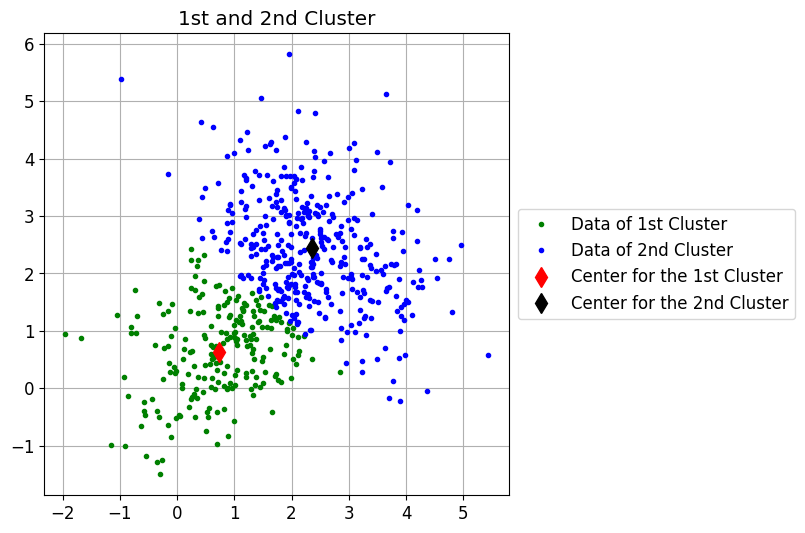

In [13]:
x1, y1 = X[b==1][:,0], X[b==1][:,1]
x2, y2 = X[b==2][:,0], X[b==2][:,1]

#plotting them together
plt.plot(x1, y1, '.', color='g', label='Data of 1st Cluster')
plt.plot(x2, y2, '.', color='b', label='Data of 2nd Cluster')
plt.plot(centers_new[0][0], centers_new[0][1], 'd', color='red', markersize=10, label='Center for the 1st Cluster')
plt.plot(centers_new[1][0], centers_new[1][1], 'd', color='black', markersize=10, label='Center for the 2nd Cluster')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('1st and 2nd Cluster')

plt.show()

# Kmeans results

In [14]:
# Accuracy score for clustering
def accuracy_score(b):
    accurate_hits = 0

    for i in range(600):
        if i<301 and b[i] == 1:
            accurate_hits += 1
        elif i>=301 and b[i] == 2:
            accurate_hits += 1

    accuracy_score = accurate_hits/600

    print(accuracy_score)

In [15]:
accuracy_score(b)

0.8266666666666667


In [16]:
print((((mean1-centers_new[0])**2).sum())**0.5)
print((((mean2-centers_new[1])**2).sum())**0.5)

0.4476708929690205
0.15828529127046595


In [17]:
kmeans_iterations

300

# Fuzzy Cmeans Implementation

In [18]:
#fuzzy c-means implementation

#initializing centers
np.random.seed(42)
centers = X[np.random.choice(n, k, replace=False)]

#iteration counter
fuzzy_iterations = 0

#initializing membership function
u = np.zeros([n,2])

In [19]:
def update_membership_functions(dist, u, e, n):
    for i in range(n): 
        if dist[0][i] == 0:
            u[i][0]=1/(1 + e)
        else:
            u[i][0] = 1/(1 + dist[1][i]/dist[0][i])

        if dist[1][i] == 0:
            u[i][1]=1/(1 + e)
        else:
            u[i][1] = 1/(1 + dist[0][i]/dist[1][i]) 
    return u

In [20]:
def update_fuzzy_centers(X, u, k):
    new = np.zeros([k,k])
    num11 = ((u[:,0]**2)*X[:,0]).sum()
    num12 = ((u[:,0]**2)*X[:,1]).sum()
    denum1 = (u[:,0]**2).sum()
    num21 = ((u[:,1]**2)*X[:,0]).sum()
    num22 = ((u[:,1]**2)*X[:,1]).sum()
    denum2 = (u[:,1]**2).sum()
    new[0] = num11/denum1, num12/denum1
    new[1] = num21/denum2, num22/denum2
    return new

In [21]:
while True:
    fuzzy_iterations += 1
    dist = euclidean_distances(X, centers, k)
    u = update_membership_functions(dist, u, e, n)
    new_centers = update_fuzzy_centers(X, u, k)
    truth_table = check_termination(new_centers, centers, e, k)
    centers = new_centers
    if truth_table == True or fuzzy_iterations == 300:
        break

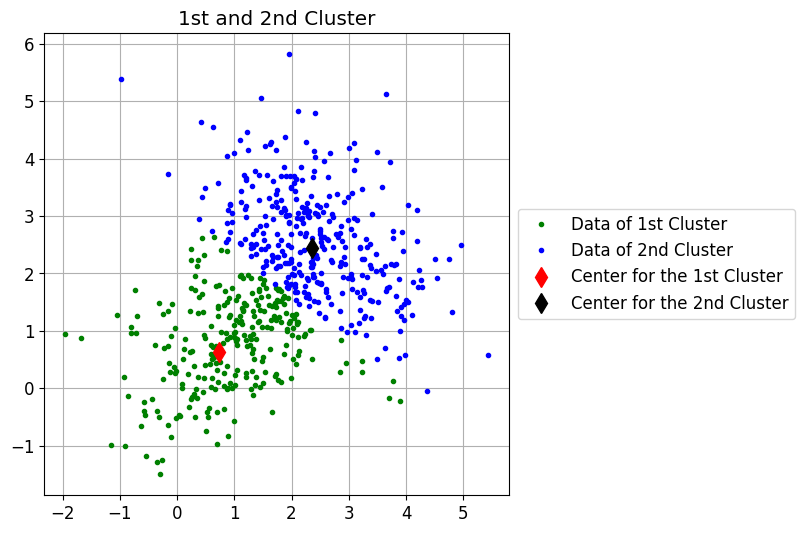

In [22]:
b = np.zeros(n)
b[u[:,0] > u[:,1]] = 1
b[u[:,1] >= u[:,0]] = 2

x1, y1 = X[b==1][:,0], X[b==1][:,1]
x2, y2 = X[b==2][:,0], X[b==2][:,1]

#plotting them together
plt.plot(x1, y1, '.', color='g', label='Data of 1st Cluster')
plt.plot(x2, y2, '.', color='b', label='Data of 2nd Cluster')
plt.plot(centers_new[0][0], centers_new[0][1], 'd', color='red', markersize=10, label='Center for the 1st Cluster')
plt.plot(centers_new[1][0], centers_new[1][1], 'd', color='black', markersize=10, label='Center for the 2nd Cluster')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('1st and 2nd Cluster')

plt.show()

# Results of Fuzzy Cmeans

In [23]:
accuracy_score(b)

0.845


In [24]:
print((((mean1-new_centers[0])**2).sum())**0.5)
print((((mean2-new_centers[1])**2).sum())**0.5)

0.4992017840070777
0.47104616990474135


In [25]:
fuzzy_iterations

300